In [879]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Exploration
Descriptions:
- <font color='green'>CLIENTNUM</font>: Unique identifier for the customer holding the account
- <font color='green'>Attrition_Flag</font>: Internal event (customer activity) variable (Existing = 1, Attrited = 0) [<font color='red'>Categorical</font>] [Output]
- <font color='green'>Customer_Age</font>: Customer's Age in Years [<font color='red'>Numerical</font>]
- <font color='green'>Gender</font>: (M = Male, F = Female) [<font color='red'>Categorical</font>]
- <font color='green'>Dependent_Count</font>: Number of dependents [<font color='red'>Numerical</font>]
- <font color='green'>Education_Level</font>: Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown) [<font color='red'>Categorical</font>]
- <font color='green'>Marital_Status</font>: (Married, Single, Divorced, Unknown) [<font color='red'>Categorical</font>] 
- <font color='green'>Income_Category</font>: Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K) [<font color='red'>Categorical</font>] 
- <font color='green'>Card_Category</font>: Type of Card (Blue, Silver, Gold, Platinum)</font> [<font color='red'>Categorical</font>]
- <font color='green'>Months_on_book</font>: Period of relationship with bank [<font color='red'>Numerical</font>]
- <font color='green'>Total_Relationship_Count</font>: Total no. of products held by the customer [<font color='red'>Numerical</font>]
- <font color='green'>Months_Inactive_12_mon</font>: No. of months inactive in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Contacts_Count_12_mon</font>: No. of Contacts in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Credit_Limit</font>: Credit Limit on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Total_Revolving_Bal</font>: Total Revolving Balance on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Open_To_Buy</font>: Open to Buy Credit Line (Average of last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Amt_Chng_Q4_Q1</font>: Change in Transaction Amount (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Amt</font>: Total Transaction Amount (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Ct</font>: Total Transaction Count (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Ct_Chng_Q4_Q1</font>: Change in Transaction Count (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Utilization_Ratio</font>: Average Card Utilization Ratio [<font color='red'>Numerical</font>]

In [880]:
df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [881]:
df = df.drop(
['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'CLIENTNUM'], axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [882]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Sort Columns (Numerical -> Categorical -> Output)

In [883]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

In [884]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

In [885]:
dfOut = df.iloc[:,0:1]

In [886]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


# Benchmark

In [887]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables

x_bm = df.drop(['Attrition_Flag'], axis = 1)
y_bm = df['Attrition_Flag']
dfbm = pd.get_dummies(x_bm)
dfbm = pd.concat([dfbm, y_bm], axis=1)

xbm = dfbm.drop(['Attrition_Flag'], axis = 1)
ybm = dfbm['Attrition_Flag']

xbm_train,xbm_test,ybm_train,ybm_test = train_test_split(xbm,ybm,test_size = 0.2,random_state = 0)

clfbm = LogisticRegression()
clfbm.fit(xbm_train,ybm_train)
print("model score: %.8f" % clfbm.score(xbm_test, ybm_test))

model score: 0.89387957


In [888]:
ybm_pred_train = clfbm.predict(xbm_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_train, y_pred=ybm_pred_train))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_train, y_pred=ybm_pred_train))

Classification report 
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      1318
           1       0.91      0.97      0.94      6783

    accuracy                           0.89      8101
   macro avg       0.82      0.73      0.76      8101
weighted avg       0.88      0.89      0.88      8101

Confusion matrix 
[[ 652  666]
 [ 230 6553]]


In [889]:
ybm_pred_test = clfbm.predict(xbm_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_test, y_pred=ybm_pred_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_test, y_pred=ybm_pred_test))

Classification report 
              precision    recall  f1-score   support

           0       0.72      0.49      0.59       309
           1       0.91      0.97      0.94      1717

    accuracy                           0.89      2026
   macro avg       0.82      0.73      0.76      2026
weighted avg       0.88      0.89      0.89      2026

Confusion matrix 
[[ 152  157]
 [  58 1659]]


<AxesSubplot:ylabel='Type'>

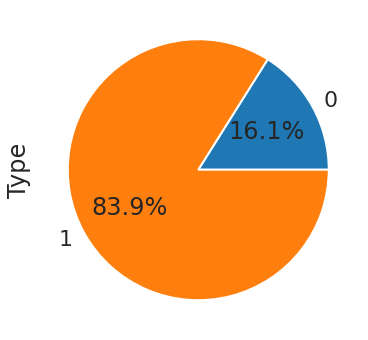

In [890]:
df.groupby('Attrition_Flag').size().plot(kind='pie',
                                                y = "Attrition_Flag",
                                                label = "Type",
                                                autopct='%1.1f%%')

In [891]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.rcParams["figure.figsize"] = [8,6]

In [892]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Attrition_Flag'],
      dtype='object')

In [893]:
Att0_messages = df[df["Attrition_Flag"] == 0]
Att1_messages  = df[df["Attrition_Flag"] == 1]
print(Att0_messages.shape)
print(Att1_messages.shape)


(1627, 20)
(8500, 20)


In [894]:
from sklearn.utils import resample

Att_upsample = resample(Att0_messages,
             replace=True,
             n_samples=len(Att1_messages),
             random_state=42)

print(Att_upsample.shape)

(8500, 20)


0    8500
1    8500
Name: Attrition_Flag, dtype: int64


<AxesSubplot:ylabel='Type'>

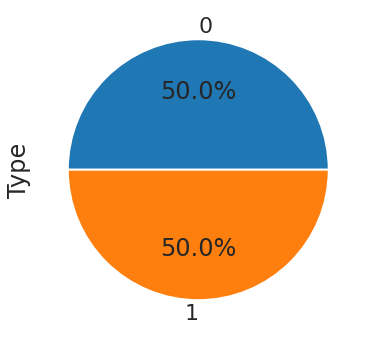

In [895]:
df_upsampled = pd.concat([Att_upsample, Att1_messages])

print(df_upsampled["Attrition_Flag"].value_counts())

df_upsampled.groupby('Attrition_Flag').size().plot(kind='pie',
                                                y = "Attrition_Flag",
                                                label = "Type",
                                                autopct='%1.1f%%')

In [896]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [897]:
df_upsampled.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,46.416588,2.360588,35.975176,3.606059,2.473294,2.657412,8381.027259,960.473059,7420.554200,0.730883,3872.189941,56.869176,0.647531,0.229272,0.500000
std,7.916856,1.290491,7.958417,1.587401,0.980001,1.115770,9089.758941,892.194377,9085.623551,0.220491,3066.444215,22.529383,0.245068,0.277136,0.500015
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,2.000000,2.000000,2.000000,2373.750000,0.000000,1438.300000,0.598000,2010.750000,40.000000,0.485000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4320.000000,932.000000,3460.000000,0.722000,2690.000000,52.000000,0.643000,0.096000,0.500000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10357.750000,1696.000000,9442.000000,0.856000,4589.000000,73.000000,0.781000,0.414000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


# Benchmark for up sampling

In [898]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables
dfbm_up = pd.get_dummies(df_upsampled)

xbm_up = dfbm_up.drop(['Attrition_Flag'], axis = 1)
ybm_up = dfbm_up['Attrition_Flag']

xbm_up_train,xbm_up_test,ybm_up_train,ybm_up_test = train_test_split(xbm_up,ybm_up,test_size = 0.2,random_state = 0)

clfbm_up = LogisticRegression()
clfbm_up.fit(xbm_up_train,ybm_up_train)
print("model score: %.8f" % clfbm_up.score(xbm_up_test, ybm_up_test))

model score: 0.82676471


In [899]:
ybm_up_pred_train = clfbm_up.predict(xbm_up_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_up_train, y_pred=ybm_up_pred_train))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_up_train, y_pred=ybm_up_pred_train))

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6810
           1       0.83      0.82      0.82      6790

    accuracy                           0.82     13600
   macro avg       0.82      0.82      0.82     13600
weighted avg       0.82      0.82      0.82     13600

Confusion matrix 
[[5646 1164]
 [1239 5551]]


In [900]:
ybm_up_pred_test = clfbm_up.predict(xbm_up_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_up_test, y_pred=ybm_up_pred_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_up_test, y_pred=ybm_up_pred_test))

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1690
           1       0.83      0.82      0.83      1710

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.83      3400
weighted avg       0.83      0.83      0.83      3400

Confusion matrix 
[[1408  282]
 [ 307 1403]]


# Down sampling

In [901]:
df.columns
Att0_messages = df[df["Attrition_Flag"] == 0]
Att1_messages  = df[df["Attrition_Flag"] == 1]
print(Att0_messages.shape)
print(Att1_messages.shape)

(1627, 20)
(8500, 20)


In [902]:
from sklearn.utils import resample

Att_dwsample = resample(Att1_messages,
             replace=True,
             n_samples=len(Att0_messages),
             random_state=42)

print(Att_dwsample.shape)

(1627, 20)


1    1627
0    1627
Name: Attrition_Flag, dtype: int64


<AxesSubplot:ylabel='Type'>

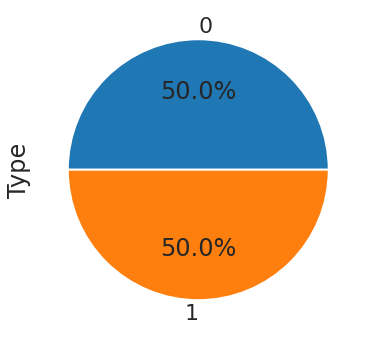

In [903]:
df_dwsampled = pd.concat([Att_dwsample, Att0_messages])

print(df_dwsampled["Attrition_Flag"].value_counts())

df_dwsampled.groupby('Attrition_Flag').size().plot(kind='pie',
                                                y = "Attrition_Flag",
                                                label = "Type",
                                                autopct='%1.1f%%')

In [904]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


In [905]:
df_dwsampled.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,46.347265,2.359250,35.773817,3.573448,2.485864,2.660725,8290.062569,963.211125,7326.851444,0.730707,3861.670252,56.793178,0.649647,0.231552,0.500000
std,7.938040,1.293536,7.957958,1.591356,0.997206,1.127779,8934.789490,893.995153,8941.778905,0.219960,3042.775349,22.185991,0.252565,0.276535,0.500077
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,2.000000,2.000000,2.000000,2422.000000,0.000000,1438.300000,0.597250,2022.000000,40.000000,0.486000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4386.000000,908.000000,3471.500000,0.718000,2692.500000,53.000000,0.647000,0.102000,0.500000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10195.000000,1701.750000,9380.250000,0.853000,4585.250000,73.000000,0.779750,0.420000,1.000000
max,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.275000,17390.000000,131.000000,3.714000,0.999000,1.000000


In [906]:
# Benchmark for up sampling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables
dfbm_dw = pd.get_dummies(df_dwsampled)

xbm_dw = dfbm_dw.drop(['Attrition_Flag'], axis = 1)
ybm_dw = dfbm_dw['Attrition_Flag']

xbm_dw_train,xbm_dw_test,ybm_dw_train,ybm_dw_test = train_test_split(xbm_dw,ybm_dw,test_size = 0.2,random_state = 0)

clfbm_dw = LogisticRegression()
clfbm_dw.fit(xbm_dw_train,ybm_dw_train)
print("model score: %.8f" % clfbm_up.score(xbm_dw_test, ybm_dw_test))



model score: 0.81566820


In [907]:
ybm_dw_pred_train = clfbm_dw.predict(xbm_dw_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_dw_train, y_pred=ybm_dw_pred_train))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_dw_train, y_pred=ybm_dw_pred_train))

Classification report 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1316
           1       0.80      0.79      0.79      1287

    accuracy                           0.80      2603
   macro avg       0.80      0.80      0.80      2603
weighted avg       0.80      0.80      0.80      2603

Confusion matrix 
[[1058  258]
 [ 269 1018]]


In [908]:
ybm_dw_pred_test = clfbm_dw.predict(xbm_dw_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=ybm_dw_test, y_pred=ybm_dw_pred_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_dw_test, y_pred=ybm_dw_pred_test))

Classification report 
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       311
           1       0.81      0.78      0.80       340

    accuracy                           0.79       651
   macro avg       0.79      0.79      0.79       651
weighted avg       0.79      0.79      0.79       651

Confusion matrix 
[[250  61]
 [ 74 266]]


# Compare

In [909]:
ybm_pred_test = clfbm.predict(xbm_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report Original \n=======================")
print(classification_report(y_true=ybm_test, y_pred=ybm_pred_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_test, y_pred=ybm_pred_test))

Classification report Original 
              precision    recall  f1-score   support

           0       0.72      0.49      0.59       309
           1       0.91      0.97      0.94      1717

    accuracy                           0.89      2026
   macro avg       0.82      0.73      0.76      2026
weighted avg       0.88      0.89      0.89      2026

Confusion matrix 
[[ 152  157]
 [  58 1659]]


In [910]:
y_up_compare_test = clfbm_up.predict(xbm_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report up \n=======================")
print(classification_report(y_true=ybm_test, y_pred=y_up_compare_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_test, y_pred=y_up_compare_test))

Classification report up 
              precision    recall  f1-score   support

           0       0.46      0.84      0.59       309
           1       0.97      0.82      0.89      1717

    accuracy                           0.82      2026
   macro avg       0.71      0.83      0.74      2026
weighted avg       0.89      0.82      0.84      2026

Confusion matrix 
[[ 260   49]
 [ 306 1411]]


In [911]:
y_dw_compare_test = clfbm_dw.predict(xbm_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report down\n=======================")
print(classification_report(y_true=ybm_test, y_pred=y_dw_compare_test))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm_test, y_pred=y_dw_compare_test))

Classification report down
              precision    recall  f1-score   support

           0       0.43      0.83      0.56       309
           1       0.96      0.80      0.87      1717

    accuracy                           0.80      2026
   macro avg       0.69      0.81      0.72      2026
weighted avg       0.88      0.80      0.83      2026

Confusion matrix 
[[ 255   54]
 [ 343 1374]]


## **Method 2** 
<hr>

## **Data Preprocessing**

In [912]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
df_dwsampled.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Attrition_Flag'],
      dtype='object')

In [913]:
df_dwsampled

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
8572,43,3,36,1,3,3,7584.0,1834,5750.0,0.818,4783,65,0.667,0.242,F,Graduate,Single,Less than $40K,Blue,1
958,45,3,33,3,1,3,7552.0,0,7552.0,0.463,1393,32,0.455,0.000,M,Graduate,Single,$60K - $80K,Blue,1
6214,48,2,36,4,3,2,9505.0,2390,7115.0,0.727,3616,68,0.619,0.251,F,Unknown,Single,Less than $40K,Blue,1
5973,65,2,53,6,3,2,2195.0,1917,278.0,0.535,4205,65,0.625,0.873,F,Doctorate,Single,Less than $40K,Blue,1
6670,31,2,25,5,3,1,3288.0,2495,793.0,0.805,4370,83,0.886,0.759,F,Unknown,Single,Unknown,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,55,3,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,F,Uneducated,Single,Unknown,Blue,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


In [914]:
df_ohe = df_dwsampled.copy()

x_ohe = df_ohe.drop(['Attrition_Flag'], axis = 1)
y_ohe = df_ohe['Attrition_Flag']
x_ohe = pd.get_dummies(x_ohe)

min_max_scaler = MinMaxScaler()
StandardScale_scaler = StandardScaler()

dfNum = df_ohe.select_dtypes(include=['int64', 'float64'])

for idx in dfNum.columns:
    if idx not in ['Attrition_Flag']:
        df_ohe[idx]=min_max_scaler.fit_transform(df_ohe[idx].values.reshape(-1,1))

In [915]:
df_ohe

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
8572,0.404762,0.6,0.534884,0.0,0.500000,0.500000,0.185796,0.728645,0.166517,0.359560,0.253140,0.454545,0.179591,0.242242,F,Graduate,Single,Less than $40K,Blue,1
958,0.452381,0.6,0.465116,0.4,0.166667,0.500000,0.184828,0.000000,0.218729,0.203516,0.052310,0.181818,0.122509,0.000000,M,Graduate,Single,$60K - $80K,Blue,1
6214,0.523810,0.4,0.534884,0.6,0.500000,0.333333,0.243871,0.949543,0.206067,0.319560,0.184005,0.479339,0.166667,0.251251,F,Unknown,Single,Less than $40K,Blue,1
5973,0.928571,0.4,0.930233,1.0,0.500000,0.333333,0.022876,0.761621,0.007968,0.235165,0.218898,0.454545,0.168282,0.873874,F,Doctorate,Single,Less than $40K,Blue,1
6670,0.119048,0.4,0.279070,0.8,0.500000,0.166667,0.055920,0.991259,0.022890,0.353846,0.228673,0.603306,0.238557,0.759760,F,Unknown,Single,Unknown,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,0.690476,0.6,0.790698,0.6,0.500000,0.500000,0.399626,1.000000,0.351665,0.072967,0.325770,0.355372,0.138395,0.172172,F,Uneducated,Single,Unknown,Blue,0
10123,0.357143,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,0.353407,0.488981,0.487603,0.183899,0.511512,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,0.428571,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.360000,0.579443,0.413223,0.220248,0.000000,F,High School,Married,Less than $40K,Blue,0
10125,0.095238,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,0.235165,0.467121,0.429752,0.194400,0.000000,M,Graduate,Unknown,$40K - $60K,Blue,0


In [916]:
x_ohe = df_ohe.drop(['Attrition_Flag'], axis = 1)
y_ohe = df_ohe['Attrition_Flag']
x_ohe = pd.get_dummies(x_ohe)


In [ ]:
selector = SelectKBest(chi2, k=12)
df_chi2_ohe = selector.fit(x_ohe, y_ohe)

col = selector.get_support(indices=True)
df_chi2_ohe = x_ohe.iloc[:,col]

### **Concatenate Data**

In [917]:
df_chi2_ohe = pd.concat([df_chi2_ohe, y_ohe], axis=1)

In [918]:
df_chi2_ohe.describe()

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Income_Category_$60K - $80K,Attrition_Flag
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,0.514690,0.414311,0.443454,0.382682,0.198559,0.386720,0.174918,0.231783,0.050707,0.130608,0.500000
std,0.318271,0.166201,0.187963,0.355183,0.180259,0.183355,0.068003,0.276812,0.219432,0.337023,0.500077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.333333,0.333333,0.000000,0.089573,0.247934,0.130856,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.500000,0.360747,0.129295,0.355372,0.174206,0.102102,0.000000,0.000000,0.500000
75%,0.800000,0.500000,0.500000,0.676103,0.241425,0.520661,0.209949,0.420420,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


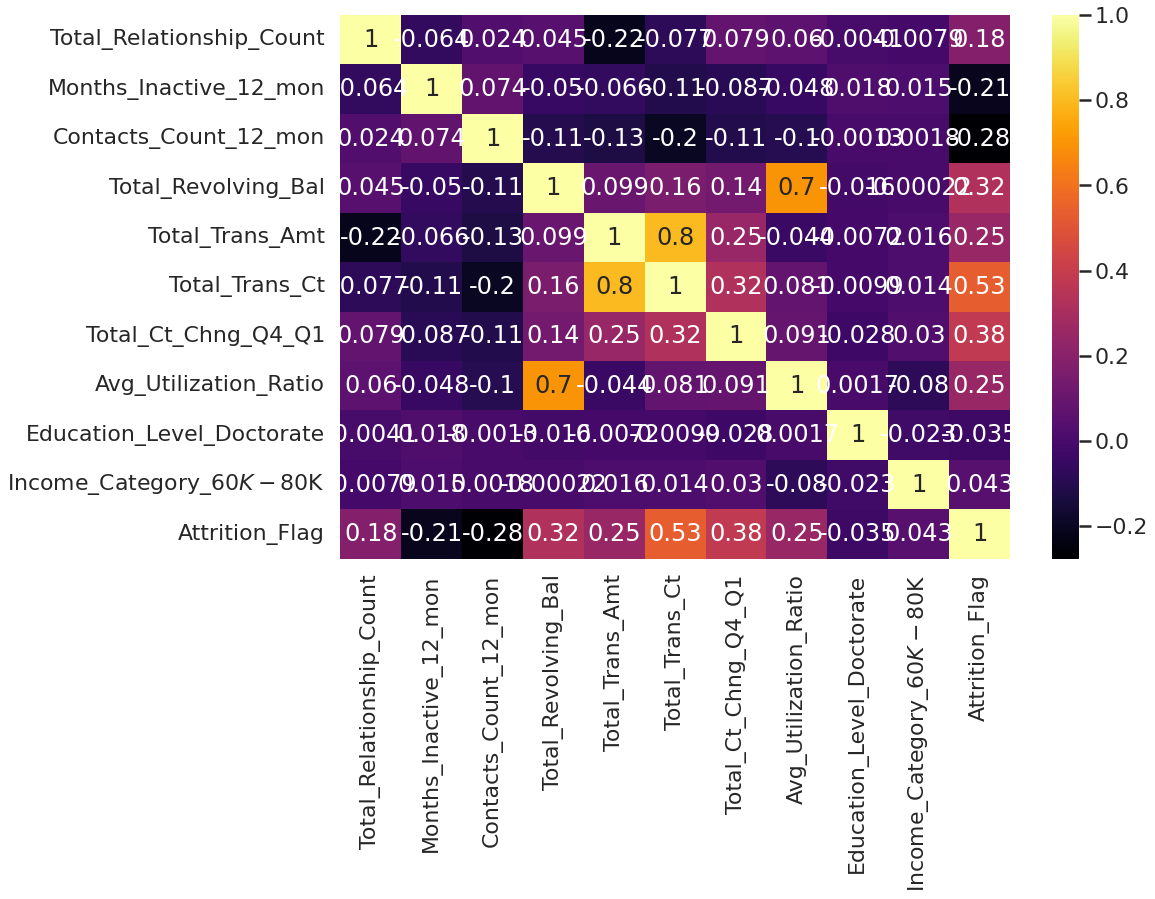

In [919]:
checkCorrFF(df_chi2_ohe)

In [920]:
# df_chi2_ohe.drop(['Credit_Limit'], axis=1, inplace=True)

In [921]:
df_chi2_ohe

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Income_Category_$60K - $80K,Attrition_Flag
8572,0.0,0.500000,0.500000,0.728645,0.253140,0.454545,0.179591,0.242242,0,0,1
958,0.4,0.166667,0.500000,0.000000,0.052310,0.181818,0.122509,0.000000,0,1,1
6214,0.6,0.500000,0.333333,0.949543,0.184005,0.479339,0.166667,0.251251,0,0,1
5973,1.0,0.500000,0.333333,0.761621,0.218898,0.454545,0.168282,0.873874,1,0,1
6670,0.8,0.500000,0.166667,0.991259,0.228673,0.603306,0.238557,0.759760,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10119,0.6,0.500000,0.500000,1.000000,0.325770,0.355372,0.138395,0.172172,0,0,0
10123,0.6,0.333333,0.500000,0.868494,0.488981,0.487603,0.183899,0.511512,0,0,0
10124,0.8,0.500000,0.666667,0.000000,0.579443,0.413223,0.220248,0.000000,0,0,0
10125,0.6,0.500000,0.500000,0.000000,0.467121,0.429752,0.194400,0.000000,0,0,0


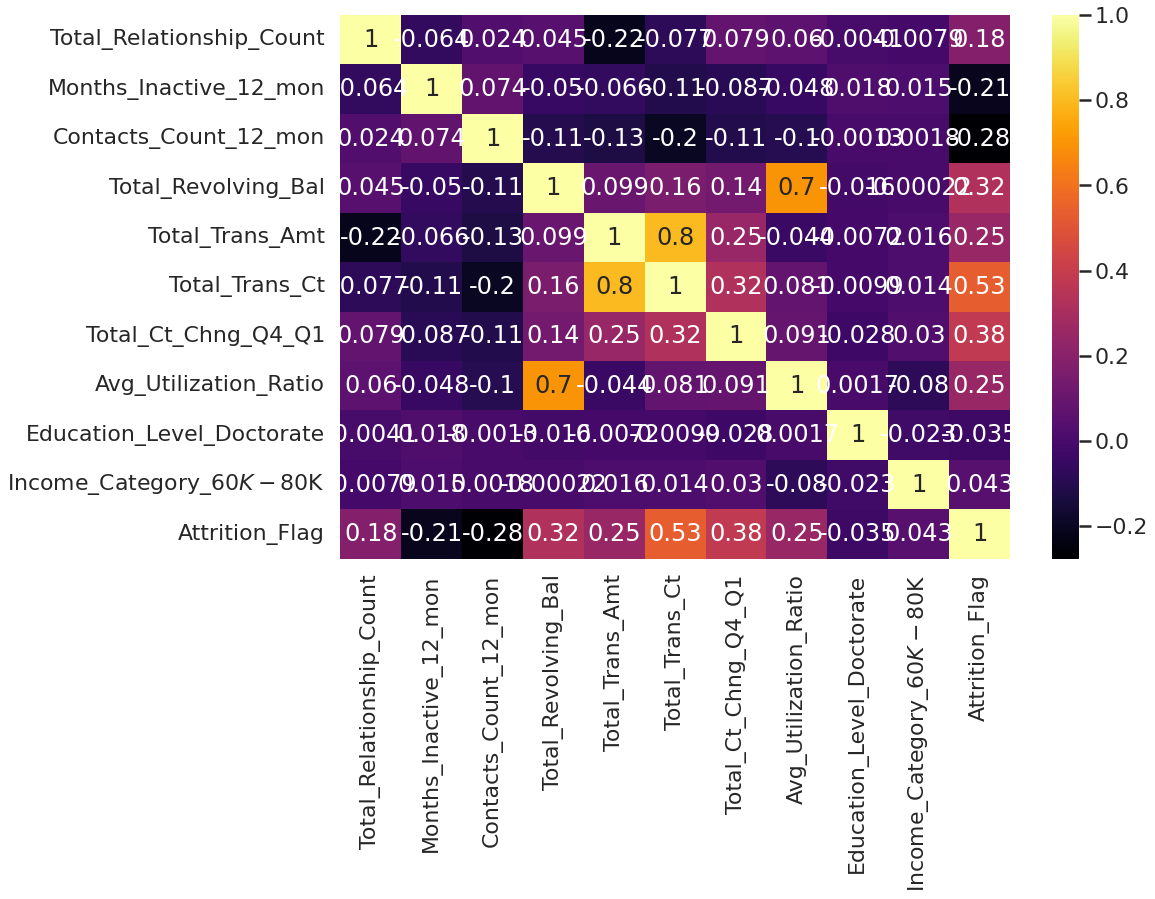

In [922]:
checkCorrFF(df_chi2_ohe)

# Model Train

In [923]:
#get the dummy variables for the categorical variables
x_ohe = df_chi2_ohe.drop(['Attrition_Flag'], axis = 1)
y_ohe = df_chi2_ohe['Attrition_Flag']

x_ohe_train,x_ohe_test,y_ohe_train,y_ohe_test = train_test_split(x_ohe, y_ohe, test_size = 0.2, random_state = 0)

clf_ohe = LogisticRegression()
clf_ohe.fit(x_ohe_train,y_ohe_train)
print("model score: %.8f" % clf_ohe.score(x_ohe_test, y_ohe_test))

model score: 0.82642089


In [924]:
# Classification report
y_ohe_pred = clf_ohe.predict(x_ohe_train)
print("Classification report \n=======================")
print(classification_report(y_true=y_ohe_train, y_pred=y_ohe_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_ohe_train, y_pred=y_ohe_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1316
           1       0.85      0.84      0.84      1287

    accuracy                           0.84      2603
   macro avg       0.84      0.84      0.84      2603
weighted avg       0.84      0.84      0.84      2603

Confusion matrix 
[[1118  198]
 [ 207 1080]]


In [925]:
# Classification report
y_ohe_pred = clf_ohe.predict(x_ohe_test)
print("Classification report \n=======================")
print(classification_report(y_true=y_ohe_test, y_pred=y_ohe_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_ohe_test, y_pred=y_ohe_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       311
           1       0.83      0.84      0.83       340

    accuracy                           0.83       651
   macro avg       0.83      0.83      0.83       651
weighted avg       0.83      0.83      0.83       651

Confusion matrix 
[[254  57]
 [ 56 284]]
